<a href="https://www.kaggle.com/code/kmljts/activation-function-demo?scriptVersionId=186869722" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import torch
from torch import nn, optim

import numpy as np
import matplotlib.pyplot as plt

from tqdm.auto import tqdm

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

device

device(type='cpu')

In [3]:
x = np.arange(15)
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [4]:
y = np.concatenate((np.arange(0, 10, 2), np.arange(10, 5, -1), np.arange(5, 20, 3)))
y

array([ 0,  2,  4,  6,  8, 10,  9,  8,  7,  6,  5,  8, 11, 14, 17])

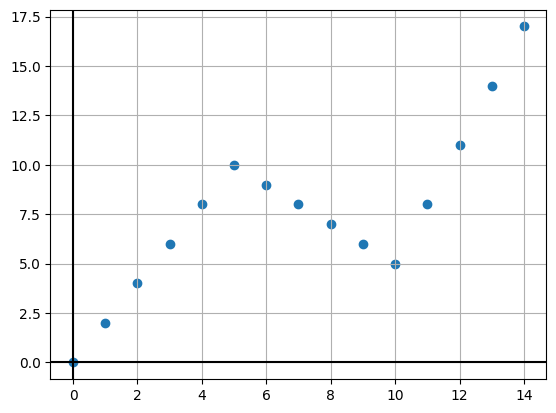

In [5]:
plt.scatter(x, y)
plt.grid()
plt.axhline(0, c='k')
plt.axvline(0, c='k')

plt.show()

In [6]:
X = torch.tensor(x).to(device).type(torch.float32).unsqueeze(1)

X, X.dtype, X.device, X.shape

(tensor([[ 0.],
         [ 1.],
         [ 2.],
         [ 3.],
         [ 4.],
         [ 5.],
         [ 6.],
         [ 7.],
         [ 8.],
         [ 9.],
         [10.],
         [11.],
         [12.],
         [13.],
         [14.]]),
 torch.float32,
 device(type='cpu'),
 torch.Size([15, 1]))

In [7]:
y = torch.tensor(y).to(device).type(torch.float32).unsqueeze(1)

y, y.dtype, y.device, y.shape

(tensor([[ 0.],
         [ 2.],
         [ 4.],
         [ 6.],
         [ 8.],
         [10.],
         [ 9.],
         [ 8.],
         [ 7.],
         [ 6.],
         [ 5.],
         [ 8.],
         [11.],
         [14.],
         [17.]]),
 torch.float32,
 device(type='cpu'),
 torch.Size([15, 1]))

## Single Layer

In [8]:
class TestModel1(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.neural_net = nn.Sequential(
            nn.Linear(1, 1)
        )
        
    def forward(self, x):
        return self.neural_net(x)

In [9]:
model = TestModel1().to(device)

model, model.state_dict()

(TestModel1(
   (neural_net): Sequential(
     (0): Linear(in_features=1, out_features=1, bias=True)
   )
 ),
 OrderedDict([('neural_net.0.weight', tensor([[0.8659]])),
              ('neural_net.0.bias', tensor([0.6609]))]))

In [10]:
model.eval()
with torch.inference_mode():
    pred = model(X)
    
pred

tensor([[ 0.6609],
        [ 1.5268],
        [ 2.3928],
        [ 3.2587],
        [ 4.1247],
        [ 4.9906],
        [ 5.8565],
        [ 6.7225],
        [ 7.5884],
        [ 8.4544],
        [ 9.3203],
        [10.1862],
        [11.0522],
        [11.9181],
        [12.7841]])

In [11]:
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [12]:
losses = []

loss = criterion(pred, y)
losses.append(loss.item())
losses

[7.620673656463623]

In [13]:
model.train()
for epoch in tqdm(range(10000)):
    pred = model(X)
    loss = criterion(pred, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    losses.append(loss.item())
#     print(loss.item())

loss

  0%|          | 0/10000 [00:00<?, ?it/s]

tensor(6.5496, grad_fn=<MseLossBackward0>)

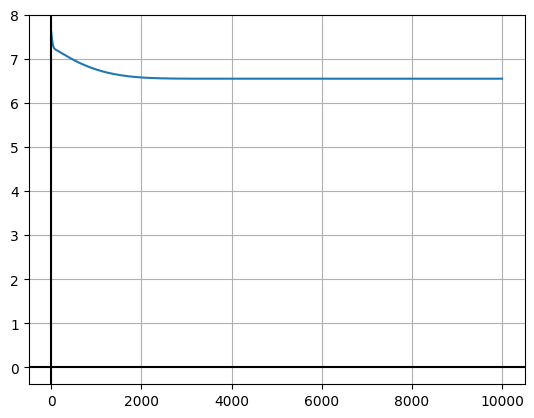

In [14]:
plt.plot(losses)
plt.grid()
plt.axhline(0, c='k')
plt.axvline(0, c='k')

plt.show()

In [15]:
model.eval()
with torch.inference_mode():
    pred = model(X)
    loss = criterion(pred, y)
    
pred, loss

(tensor([[ 2.2917],
         [ 3.0595],
         [ 3.8274],
         [ 4.5952],
         [ 5.3631],
         [ 6.1310],
         [ 6.8988],
         [ 7.6667],
         [ 8.4345],
         [ 9.2024],
         [ 9.9702],
         [10.7381],
         [11.5060],
         [12.2738],
         [13.0417]]),
 tensor(6.5496))

In [16]:
x1 = np.linspace(0, 15, 1001)
x1

array([ 0.   ,  0.015,  0.03 , ..., 14.97 , 14.985, 15.   ])

In [17]:
x1_tensor = torch.tensor(x1).to(device).type(torch.float32).unsqueeze(1)

model.eval()
with torch.inference_mode():
    y1_tensor = model(x1_tensor)
    
y1 = y1_tensor.cpu().numpy()
y1

array([[ 2.2916653],
       [ 2.303183 ],
       [ 2.314701 ],
       ...,
       [13.786489 ],
       [13.798006 ],
       [13.809524 ]], dtype=float32)

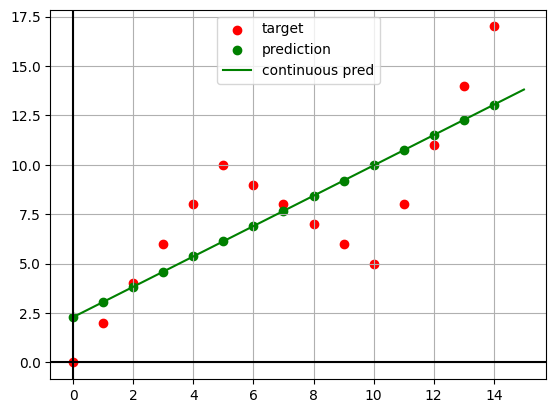

In [18]:
plt.scatter(X.cpu().numpy(), y.cpu().numpy(), label='target', c='r')
plt.scatter(X.cpu().numpy(), pred.cpu().numpy(), label='prediction', c='g')
plt.plot(x1, y1, label='continuous pred', c='g')
plt.grid()
plt.axhline(0, c='k')
plt.axvline(0, c='k')
plt.legend()

plt.show()

## Two Layers without Activation

In [19]:
class TestModel2(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.neural_net = nn.Sequential(
            nn.Linear(1, 10),
            nn.Linear(10, 1)
        )
        
    def forward(self, x):
        return self.neural_net(x)

In [20]:
model = TestModel2().to(device)

model, model.state_dict()

(TestModel2(
   (neural_net): Sequential(
     (0): Linear(in_features=1, out_features=10, bias=True)
     (1): Linear(in_features=10, out_features=1, bias=True)
   )
 ),
 OrderedDict([('neural_net.0.weight',
               tensor([[ 0.8359],
                       [-0.7528],
                       [ 0.7304],
                       [-0.8113],
                       [-0.6691],
                       [-0.5578],
                       [-0.7711],
                       [-0.8836],
                       [ 0.5532],
                       [ 0.9632]])),
              ('neural_net.0.bias',
               tensor([-0.2312, -0.6511, -0.5270, -0.9013,  0.9815,  0.3604,  0.6685, -0.6560,
                        0.2569,  0.3716])),
              ('neural_net.1.weight',
               tensor([[-0.0905, -0.2654, -0.0468,  0.0046, -0.0520,  0.2892, -0.0499, -0.1723,
                        -0.0717, -0.2186]])),
              ('neural_net.1.bias', tensor([0.0387]))]))

In [21]:
model.eval()
with torch.inference_mode():
    pred = model(X)
    
pred

tensor([[ 0.2862],
        [ 0.1863],
        [ 0.0864],
        [-0.0134],
        [-0.1133],
        [-0.2132],
        [-0.3131],
        [-0.4129],
        [-0.5128],
        [-0.6127],
        [-0.7126],
        [-0.8124],
        [-0.9123],
        [-1.0122],
        [-1.1121]])

In [22]:
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [23]:
losses = []

loss = criterion(pred, y)
losses.append(loss.item())
losses

[85.88473510742188]

In [24]:
model.train()
for epoch in tqdm(range(10000)):
    pred = model(X)
    loss = criterion(pred, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    losses.append(loss.item())
#     print(loss.item())

loss

  0%|          | 0/10000 [00:00<?, ?it/s]

tensor(6.5496, grad_fn=<MseLossBackward0>)

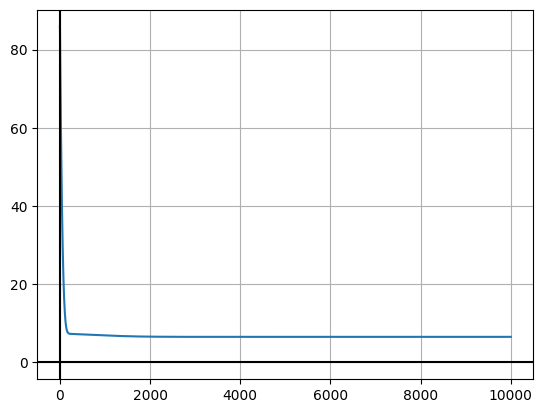

In [25]:
plt.plot(losses)
plt.grid()
plt.axhline(0, c='k')
plt.axvline(0, c='k')

plt.show()

In [26]:
model.eval()
with torch.inference_mode():
    pred = model(X)
    loss = criterion(pred, y)
    
pred, loss

(tensor([[ 2.2917],
         [ 3.0595],
         [ 3.8274],
         [ 4.5952],
         [ 5.3631],
         [ 6.1310],
         [ 6.8988],
         [ 7.6667],
         [ 8.4345],
         [ 9.2024],
         [ 9.9702],
         [10.7381],
         [11.5060],
         [12.2738],
         [13.0417]]),
 tensor(6.5496))

In [27]:
x1 = np.linspace(0, 15, 1001)
x1

array([ 0.   ,  0.015,  0.03 , ..., 14.97 , 14.985, 15.   ])

In [28]:
x1_tensor = torch.tensor(x1).to(device).type(torch.float32).unsqueeze(1)

model.eval()
with torch.inference_mode():
    y1_tensor = model(x1_tensor)
    
y1 = y1_tensor.cpu().numpy()
y1

array([[ 2.2916665],
       [ 2.3031845],
       [ 2.3147025],
       ...,
       [13.786489 ],
       [13.798006 ],
       [13.809525 ]], dtype=float32)

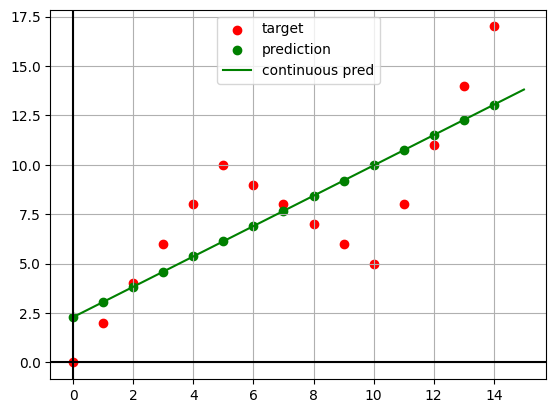

In [29]:
plt.scatter(X.cpu().numpy(), y.cpu().numpy(), label='target', c='r')
plt.scatter(X.cpu().numpy(), pred.cpu().numpy(), label='prediction', c='g')
plt.plot(x1, y1, label='continuous pred', c='g')
plt.grid()
plt.axhline(0, c='k')
plt.axvline(0, c='k')
plt.legend()

plt.show()

## Two Layers with Activation (ReLU)

In [30]:
class TestModel3(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.neural_net = nn.Sequential(
            nn.Linear(1, 10),
            nn.ReLU(),
            nn.Linear(10, 1)
        )
        
    def forward(self, x):
        return self.neural_net(x)

In [31]:
model = TestModel3().to(device)

model, model.state_dict()

(TestModel3(
   (neural_net): Sequential(
     (0): Linear(in_features=1, out_features=10, bias=True)
     (1): ReLU()
     (2): Linear(in_features=10, out_features=1, bias=True)
   )
 ),
 OrderedDict([('neural_net.0.weight',
               tensor([[-0.9355],
                       [ 0.1801],
                       [ 0.9801],
                       [ 0.3416],
                       [-0.1115],
                       [-0.9933],
                       [-0.8475],
                       [ 0.1384],
                       [ 0.5146],
                       [-0.5869]])),
              ('neural_net.0.bias',
               tensor([ 0.0349, -0.9685, -0.1609, -0.7173,  0.7533,  0.8937,  0.9714,  0.7456,
                       -0.6087, -0.1746])),
              ('neural_net.2.weight',
               tensor([[-0.0778,  0.2931, -0.1921,  0.1671,  0.0728,  0.2442, -0.2419, -0.0649,
                         0.2325,  0.0488]])),
              ('neural_net.2.bias', tensor([-0.1189]))]))

In [32]:
model.eval()
with torch.inference_mode():
    pred = model(X)
    
pred

tensor([[-0.1319],
        [-0.3168],
        [-0.3944],
        [-0.4288],
        [-0.4574],
        [-0.4860],
        [-0.4819],
        [-0.4558],
        [-0.4236],
        [-0.3913],
        [-0.3591],
        [-0.3268],
        [-0.2946],
        [-0.2623],
        [-0.2301]])

In [33]:
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [34]:
losses = []

loss = criterion(pred, y)
losses.append(loss.item())
losses

[82.05265808105469]

In [35]:
model.train()
for epoch in tqdm(range(10000)):
    pred = model(X)
    loss = criterion(pred, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    losses.append(loss.item())
#     print(loss.item())

loss

  0%|          | 0/10000 [00:00<?, ?it/s]

tensor(5.7440, grad_fn=<MseLossBackward0>)

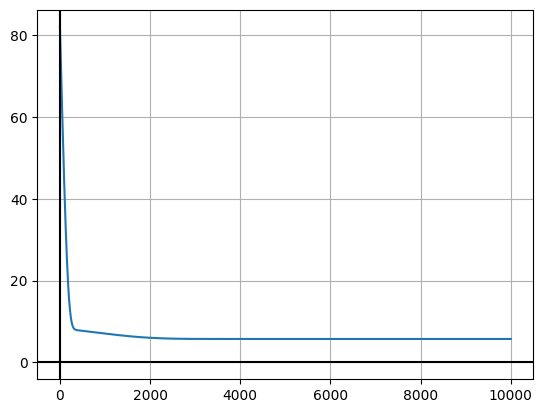

In [36]:
plt.plot(losses)
plt.grid()
plt.axhline(0, c='k')
plt.axvline(0, c='k')

plt.show()

In [37]:
model.eval()
with torch.inference_mode():
    pred = model(X)
    loss = criterion(pred, y)
    
pred, loss

(tensor([[1.1921e-07],
         [2.0000e+00],
         [4.0000e+00],
         [5.8718e+00],
         [6.4557e+00],
         [7.0396e+00],
         [7.6235e+00],
         [8.2075e+00],
         [8.7914e+00],
         [9.3753e+00],
         [9.9592e+00],
         [1.0543e+01],
         [1.1127e+01],
         [1.1711e+01],
         [1.2295e+01]]),
 tensor(5.7440))

In [38]:
x1 = np.linspace(0, 15, 1001)
x1

array([ 0.   ,  0.015,  0.03 , ..., 14.97 , 14.985, 15.   ])

In [39]:
x1_tensor = torch.tensor(x1).to(device).type(torch.float32).unsqueeze(1)

model.eval()
with torch.inference_mode():
    y1_tensor = model(x1_tensor)
    
y1 = y1_tensor.cpu().numpy()
y1

array([[1.1920929e-07],
       [3.2786250e-02],
       [6.5572858e-02],
       ...,
       [1.2861270e+01],
       [1.2870030e+01],
       [1.2878788e+01]], dtype=float32)

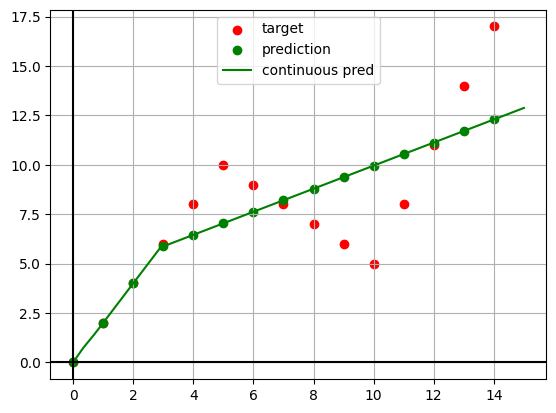

In [40]:
plt.scatter(X.cpu().numpy(), y.cpu().numpy(), label='target', c='r')
plt.scatter(X.cpu().numpy(), pred.cpu().numpy(), label='prediction', c='g')
plt.plot(x1, y1, label='continuous pred', c='g')
plt.grid()
plt.axhline(0, c='k')
plt.axvline(0, c='k')
plt.legend()

plt.show()

## Three Layers with Activation (ReLU)

In [41]:
class TestModel4(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.neural_net = nn.Sequential(
            nn.Linear(1, 10),
            nn.ReLU(),
            nn.Linear(10, 10),
            nn.ReLU(),
            nn.Linear(10, 1)
        )
        
    def forward(self, x):
        return self.neural_net(x)

In [42]:
model = TestModel4().to(device)

model, model.state_dict()

(TestModel4(
   (neural_net): Sequential(
     (0): Linear(in_features=1, out_features=10, bias=True)
     (1): ReLU()
     (2): Linear(in_features=10, out_features=10, bias=True)
     (3): ReLU()
     (4): Linear(in_features=10, out_features=1, bias=True)
   )
 ),
 OrderedDict([('neural_net.0.weight',
               tensor([[-0.5679],
                       [ 0.9508],
                       [ 0.5445],
                       [ 0.6024],
                       [-0.9115],
                       [ 0.2257],
                       [-0.9765],
                       [-0.3256],
                       [ 0.2722],
                       [ 0.4651]])),
              ('neural_net.0.bias',
               tensor([-0.3293, -0.3148,  0.0142,  0.8730,  0.1138, -0.4351,  0.0720, -0.0063,
                       -0.1336,  0.0768])),
              ('neural_net.2.weight',
               tensor([[ 0.2062, -0.0321, -0.2768,  0.3157, -0.1649,  0.3047, -0.0440,  0.1811,
                        -0.0682, -0.1658],
 

In [43]:
model.eval()
with torch.inference_mode():
    pred = model(X)
    
pred

tensor([[ 0.2167],
        [ 0.1010],
        [ 0.0059],
        [-0.0591],
        [-0.1240],
        [-0.1890],
        [-0.2540],
        [-0.3190],
        [-0.3839],
        [-0.4489],
        [-0.5139],
        [-0.5789],
        [-0.6438],
        [-0.7088],
        [-0.7738]])

In [44]:
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [45]:
losses = []

loss = criterion(pred, y)
losses.append(loss.item())
losses

[83.2613754272461]

In [46]:
model.train()
for epoch in tqdm(range(10000)):
    pred = model(X)
    loss = criterion(pred, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    losses.append(loss.item())
#     print(loss.item())

loss

  0%|          | 0/10000 [00:00<?, ?it/s]

tensor(5.7440, grad_fn=<MseLossBackward0>)

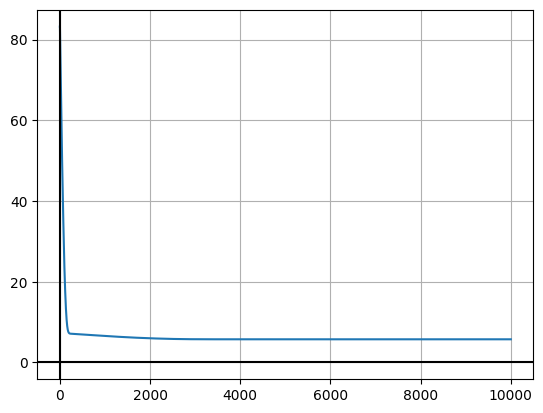

In [47]:
plt.plot(losses)
plt.grid()
plt.axhline(0, c='k')
plt.axvline(0, c='k')

plt.show()

In [48]:
model.eval()
with torch.inference_mode():
    pred = model(X)
    loss = criterion(pred, y)
    
pred, loss

(tensor([[1.1444e-05],
         [2.0000e+00],
         [4.0000e+00],
         [5.8718e+00],
         [6.4557e+00],
         [7.0396e+00],
         [7.6235e+00],
         [8.2075e+00],
         [8.7914e+00],
         [9.3753e+00],
         [9.9592e+00],
         [1.0543e+01],
         [1.1127e+01],
         [1.1711e+01],
         [1.2295e+01]]),
 tensor(5.7440))

In [49]:
x1 = np.linspace(0, 15, 1001)
x1

array([ 0.   ,  0.015,  0.03 , ..., 14.97 , 14.985, 15.   ])

In [50]:
x1_tensor = torch.tensor(x1).to(device).type(torch.float32).unsqueeze(1)

model.eval()
with torch.inference_mode():
    y1_tensor = model(x1_tensor)
    
y1 = y1_tensor.cpu().numpy()
y1

array([[1.14440918e-05],
       [4.59651947e-02],
       [9.19184685e-02],
       ...,
       [1.28612709e+01],
       [1.28700285e+01],
       [1.28787889e+01]], dtype=float32)

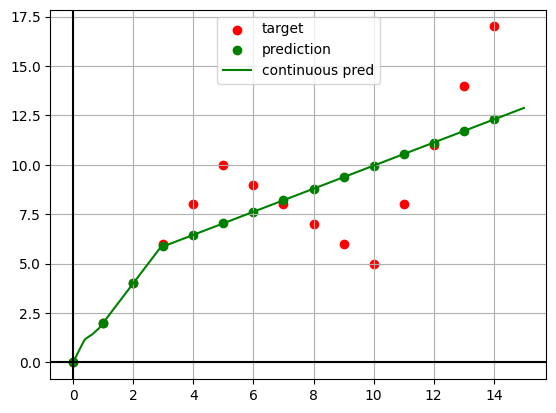

In [51]:
plt.scatter(X.cpu().numpy(), y.cpu().numpy(), label='target', c='r')
plt.scatter(X.cpu().numpy(), pred.cpu().numpy(), label='prediction', c='g')
plt.plot(x1, y1, label='continuous pred', c='g')
plt.grid()
plt.axhline(0, c='k')
plt.axvline(0, c='k')
plt.legend()

plt.show()

## Three Layers with Activation (LeakyReLU)

In [52]:
class TestModel5(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.neural_net = nn.Sequential(
            nn.Linear(1, 10),
            nn.LeakyReLU(),
            nn.Linear(10, 10),
            nn.LeakyReLU(),
            nn.Linear(10, 1)
        )
        
    def forward(self, x):
        return self.neural_net(x)

In [53]:
model = TestModel5().to(device)

model, model.state_dict()

(TestModel5(
   (neural_net): Sequential(
     (0): Linear(in_features=1, out_features=10, bias=True)
     (1): LeakyReLU(negative_slope=0.01)
     (2): Linear(in_features=10, out_features=10, bias=True)
     (3): LeakyReLU(negative_slope=0.01)
     (4): Linear(in_features=10, out_features=1, bias=True)
   )
 ),
 OrderedDict([('neural_net.0.weight',
               tensor([[ 0.8203],
                       [-0.2735],
                       [-0.9155],
                       [ 0.3752],
                       [ 0.7681],
                       [-0.6677],
                       [-0.9447],
                       [-0.7825],
                       [-0.4247],
                       [ 0.3877]])),
              ('neural_net.0.bias',
               tensor([-0.2089,  0.2364, -0.5937,  0.5977,  0.5961, -0.1901, -0.6788,  0.7175,
                        0.6662, -0.6768])),
              ('neural_net.2.weight',
               tensor([[-0.1048,  0.2686,  0.0464,  0.0553, -0.2768,  0.0240, -0.2212, -0.31

In [54]:
model.eval()
with torch.inference_mode():
    pred = model(X)
    
pred

tensor([[0.1205],
        [0.0219],
        [0.0303],
        [0.0538],
        [0.0737],
        [0.0907],
        [0.1077],
        [0.1247],
        [0.1416],
        [0.1586],
        [0.1756],
        [0.1926],
        [0.2095],
        [0.2265],
        [0.2435]])

In [55]:
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [56]:
losses = []

loss = criterion(pred, y)
losses.append(loss.item())
losses

[73.96482849121094]

In [57]:
model.train()
for epoch in tqdm(range(10000)):
    pred = model(X)
    loss = criterion(pred, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    losses.append(loss.item())
#     print(loss.item())

loss

  0%|          | 0/10000 [00:00<?, ?it/s]

tensor(1.4128e-11, grad_fn=<MseLossBackward0>)

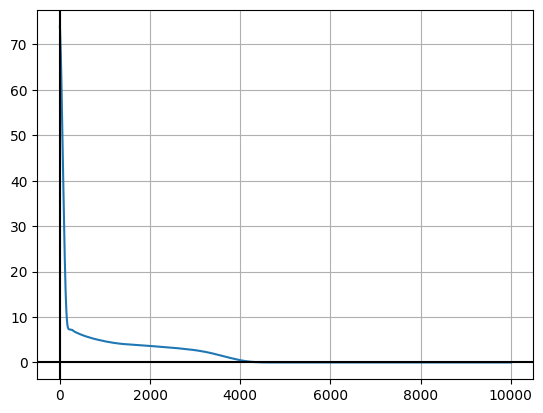

In [58]:
plt.plot(losses)
plt.grid()
plt.axhline(0, c='k')
plt.axvline(0, c='k')

plt.show()

In [59]:
model.eval()
with torch.inference_mode():
    pred = model(X)
    loss = criterion(pred, y)
    
pred, loss

(tensor([[3.6955e-06],
         [2.0000e+00],
         [4.0000e+00],
         [6.0000e+00],
         [8.0000e+00],
         [1.0000e+01],
         [9.0000e+00],
         [8.0000e+00],
         [7.0000e+00],
         [6.0000e+00],
         [5.0000e+00],
         [8.0000e+00],
         [1.1000e+01],
         [1.4000e+01],
         [1.7000e+01]]),
 tensor(1.2037e-11))

In [60]:
x1 = np.linspace(0, 15, 1001)
x1

array([ 0.   ,  0.015,  0.03 , ..., 14.97 , 14.985, 15.   ])

In [61]:
x1_tensor = torch.tensor(x1).to(device).type(torch.float32).unsqueeze(1)

model.eval()
with torch.inference_mode():
    y1_tensor = model(x1_tensor)
    
y1 = y1_tensor.cpu().numpy()
y1

array([[3.6954880e-06],
       [2.8238654e-02],
       [5.6475520e-02],
       ...,
       [1.9909998e+01],
       [1.9954992e+01],
       [1.9999996e+01]], dtype=float32)

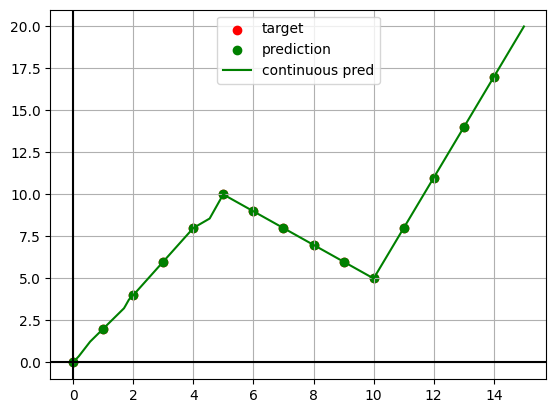

In [62]:
plt.scatter(X.cpu().numpy(), y.cpu().numpy(), label='target', c='r')
plt.scatter(X.cpu().numpy(), pred.cpu().numpy(), label='prediction', c='g')
plt.plot(x1, y1, label='continuous pred', c='g')
plt.grid()
plt.axhline(0, c='k')
plt.axvline(0, c='k')
plt.legend()

plt.show()

## Three Layers with Activation (GELU)

In [63]:
class TestModel6(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.neural_net = nn.Sequential(
            nn.Linear(1, 10),
            nn.GELU(),
            nn.Linear(10, 10),
            nn.GELU(),
            nn.Linear(10, 1)
        )
        
    def forward(self, x):
        return self.neural_net(x)

In [64]:
model = TestModel6().to(device)

model, model.state_dict()

(TestModel6(
   (neural_net): Sequential(
     (0): Linear(in_features=1, out_features=10, bias=True)
     (1): GELU(approximate='none')
     (2): Linear(in_features=10, out_features=10, bias=True)
     (3): GELU(approximate='none')
     (4): Linear(in_features=10, out_features=1, bias=True)
   )
 ),
 OrderedDict([('neural_net.0.weight',
               tensor([[-0.8031],
                       [-0.8867],
                       [-0.7337],
                       [ 0.1600],
                       [-0.7777],
                       [ 0.3446],
                       [-0.6511],
                       [-0.0357],
                       [-0.2904],
                       [ 0.9700]])),
              ('neural_net.0.bias',
               tensor([ 0.1663, -0.2788,  0.6667,  0.9565, -0.1842,  0.7087,  0.7011, -0.4604,
                       -0.0594,  0.4540])),
              ('neural_net.2.weight',
               tensor([[-0.1661, -0.1039,  0.2362, -0.1445,  0.0047, -0.1178,  0.0314,  0.2267,
        

In [65]:
model.eval()
with torch.inference_mode():
    pred = model(X)
    
pred

tensor([[0.0516],
        [0.1066],
        [0.1663],
        [0.2237],
        [0.2947],
        [0.3791],
        [0.4686],
        [0.5572],
        [0.6429],
        [0.7255],
        [0.8055],
        [0.8835],
        [0.9603],
        [1.0362],
        [1.1114]])

In [66]:
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [67]:
losses = []

loss = criterion(pred, y)
losses.append(loss.item())
losses

[65.96924591064453]

In [68]:
model.train()
for epoch in tqdm(range(10000)):
    pred = model(X)
    loss = criterion(pred, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    losses.append(loss.item())
#     print(loss.item())

loss

  0%|          | 0/10000 [00:00<?, ?it/s]

tensor(0.0098, grad_fn=<MseLossBackward0>)

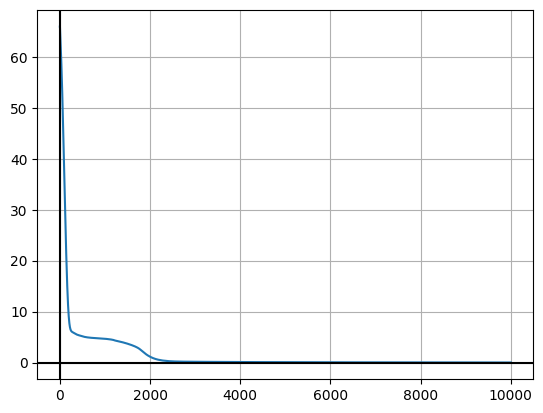

In [69]:
plt.plot(losses)
plt.grid()
plt.axhline(0, c='k')
plt.axvline(0, c='k')

plt.show()

In [70]:
model.eval()
with torch.inference_mode():
    pred = model(X)
    loss = criterion(pred, y)
    
pred, loss

(tensor([[-4.5580e-03],
         [ 2.0012e+00],
         [ 3.9991e+00],
         [ 5.9863e+00],
         [ 8.0637e+00],
         [ 9.8319e+00],
         [ 9.1828e+00],
         [ 7.9080e+00],
         [ 7.0768e+00],
         [ 5.8543e+00],
         [ 5.1589e+00],
         [ 7.8766e+00],
         [ 1.1063e+01],
         [ 1.3981e+01],
         [ 1.6999e+01]]),
 tensor(0.0098))

In [71]:
x1 = np.linspace(0, 15, 1001)
x1

array([ 0.   ,  0.015,  0.03 , ..., 14.97 , 14.985, 15.   ])

In [72]:
x1_tensor = torch.tensor(x1).to(device).type(torch.float32).unsqueeze(1)

model.eval()
with torch.inference_mode():
    y1_tensor = model(x1_tensor)
    
y1 = y1_tensor.cpu().numpy()
y1

array([[-4.5579672e-03],
       [ 4.7554612e-02],
       [ 9.9255204e-02],
       ...,
       [ 1.9009918e+01],
       [ 1.9031658e+01],
       [ 1.9053158e+01]], dtype=float32)

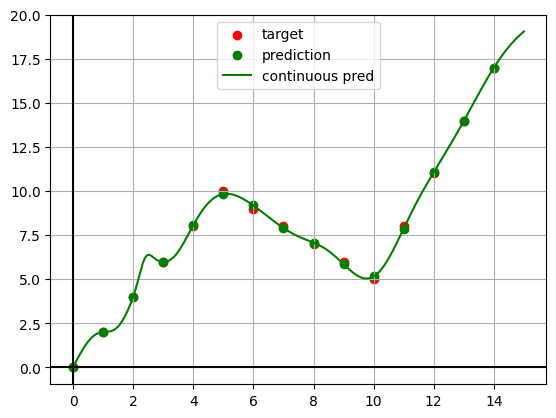

In [73]:
plt.scatter(X.cpu().numpy(), y.cpu().numpy(), label='target', c='r')
plt.scatter(X.cpu().numpy(), pred.cpu().numpy(), label='prediction', c='g')
plt.plot(x1, y1, label='continuous pred', c='g')
plt.grid()
plt.axhline(0, c='k')
plt.axvline(0, c='k')
plt.legend()

plt.show()

## Four Layers with Activation (ReLU)

In [74]:
class TestModel7(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.neural_net = nn.Sequential(
            nn.Linear(1, 10),
            nn.ReLU(),
            nn.Linear(10, 10),
            nn.ReLU(),
            nn.Linear(10, 10),
            nn.ReLU(),
            nn.Linear(10, 1)
        )
        
    def forward(self, x):
        return self.neural_net(x)

In [75]:
model = TestModel7().to(device)

model, model.state_dict()

(TestModel7(
   (neural_net): Sequential(
     (0): Linear(in_features=1, out_features=10, bias=True)
     (1): ReLU()
     (2): Linear(in_features=10, out_features=10, bias=True)
     (3): ReLU()
     (4): Linear(in_features=10, out_features=10, bias=True)
     (5): ReLU()
     (6): Linear(in_features=10, out_features=1, bias=True)
   )
 ),
 OrderedDict([('neural_net.0.weight',
               tensor([[-0.8820],
                       [ 0.4209],
                       [-0.8277],
                       [ 0.5203],
                       [-0.4624],
                       [-0.7641],
                       [ 0.7364],
                       [ 0.2001],
                       [-0.4154],
                       [ 0.3649]])),
              ('neural_net.0.bias',
               tensor([ 0.4679, -0.4485,  0.2959, -0.4191,  0.2547, -0.6671, -0.4161,  0.5202,
                        0.4002, -0.6445])),
              ('neural_net.2.weight',
               tensor([[-0.0765, -0.1749, -0.1236,  0.0805,  0

In [76]:
model.eval()
with torch.inference_mode():
    pred = model(X)
    
pred

tensor([[0.2957],
        [0.2545],
        [0.2472],
        [0.2706],
        [0.3184],
        [0.3415],
        [0.3541],
        [0.3667],
        [0.3791],
        [0.3914],
        [0.4037],
        [0.4160],
        [0.4284],
        [0.4407],
        [0.4530]])

In [77]:
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [78]:
losses = []

loss = criterion(pred, y)
losses.append(loss.item())
losses

[70.5806655883789]

In [79]:
model.train()
for epoch in tqdm(range(10000)):
    pred = model(X)
    loss = criterion(pred, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    losses.append(loss.item())
#     print(loss.item())

loss

  0%|          | 0/10000 [00:00<?, ?it/s]

tensor(0.0001, grad_fn=<MseLossBackward0>)

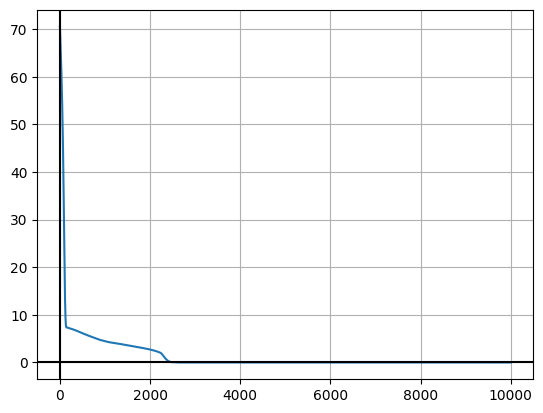

In [80]:
plt.plot(losses)
plt.grid()
plt.axhline(0, c='k')
plt.axvline(0, c='k')

plt.show()

In [81]:
model.eval()
with torch.inference_mode():
    pred = model(X)
    loss = criterion(pred, y)
    
pred, loss

(tensor([[2.6047e-04],
         [2.0001e+00],
         [4.0001e+00],
         [5.9997e+00],
         [8.0005e+00],
         [1.0000e+01],
         [9.0008e+00],
         [8.0012e+00],
         [7.0028e+00],
         [6.0031e+00],
         [5.0168e+00],
         [8.0193e+00],
         [1.1022e+01],
         [1.4024e+01],
         [1.7027e+01]]),
 tensor(0.0002))

In [82]:
x1 = np.linspace(0, 15, 1001)
x1

array([ 0.   ,  0.015,  0.03 , ..., 14.97 , 14.985, 15.   ])

In [83]:
x1_tensor = torch.tensor(x1).to(device).type(torch.float32).unsqueeze(1)

model.eval()
with torch.inference_mode():
    y1_tensor = model(x1_tensor)
    
y1 = y1_tensor.cpu().numpy()
y1

array([[2.6047230e-04],
       [1.6752765e-02],
       [3.3245176e-02],
       ...,
       [1.9899885e+01],
       [1.9944265e+01],
       [1.9988646e+01]], dtype=float32)

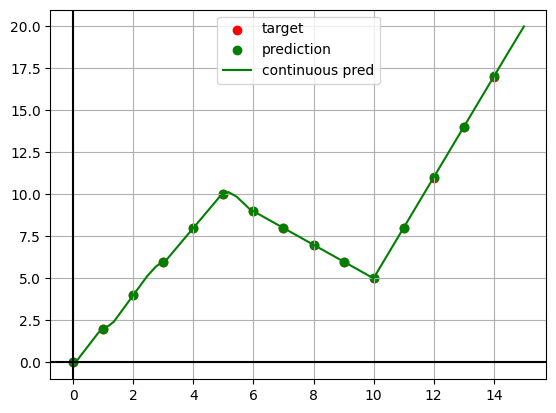

In [84]:
plt.scatter(X.cpu().numpy(), y.cpu().numpy(), label='target', c='r')
plt.scatter(X.cpu().numpy(), pred.cpu().numpy(), label='prediction', c='g')
plt.plot(x1, y1, label='continuous pred', c='g')
plt.grid()
plt.axhline(0, c='k')
plt.axvline(0, c='k')
plt.legend()

plt.show()